# C10 Morphological Transformations
ver
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

y

http://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm

In [1]:
#init modules
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

#set basic vars
baseDir=os.path.join('..','..','ExamplesRepo')
#file name, tuple with only one name, use baseFileNameList=('j.png',) because baseFileNameList=('j.png') is a string
# ver https://medium.com/@GalarnykMichael/python-basics-9-tuples-tuple-manipulation-and-the-fibonacci-sequence-2d0da4e2d326
baseFileNameList=('j.png','jnoise1.png','jnoise2.png', 'cameraman.tif', 'eight.tif')

In [2]:
#store the images in a dictionary
#using a comprehension solution 
imgDict={name: None for name in baseFileNameList}
for name in baseFileNameList:
    fileName=os.path.join(baseDir, name)
    imgDict[name] = cv2.imread(fileName, cv2.COLOR_RGB2BGR)   

In [3]:
#esta fun muestra dos imagenes y devuelve los handles a los ejes para luego poder usarlos con un plot o un scatter
#sacado de https://python4astronomers.github.io/plotting/advanced.html
def disp2img(img1, img2, figSize=(5,5), img1Title="Original", img2Title="Filtered"):
    fig=plt.figure(figsize=figSize) # create a figure object
    
    
    axis1 = fig.add_subplot(1, 2, 1)  # create 1st sub axes object in the figure 
    axis1.imshow(img1)
    axis1.set_xticks([]), axis1.set_yticks([])
    axis1.set_title(img1Title, fontsize='large')
          
    axis2= fig.add_subplot(1, 2, 2)  # create 2nd sub axes object in the figure
    axis2.imshow(img2)
    axis2.set_xticks([]), axis2.set_yticks([])   
    axis2.set_title(img2Title, fontsize='large')
    
    
    return axis1, axis2;

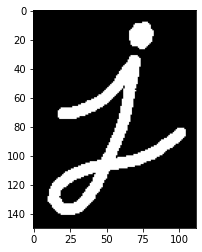

In [4]:
#use the dict as a switch-case
name=baseFileNameList[0]
img=imgDict[name]
plt.imshow(img)

# Erosion

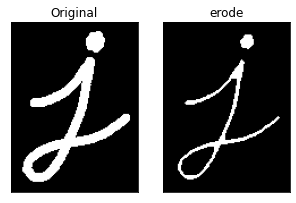

In [5]:
kernel = np.ones((5,5),np.uint8)
imgnew = cv2.erode(img,kernel,iterations = 1)
disp2img(img, imgnew, img2Title="erode");

# dilation

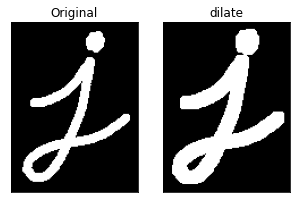

In [6]:
imgnew = cv2.dilate(img,kernel,iterations = 1)
disp2img(img, imgnew, img2Title="dilate");

# opening

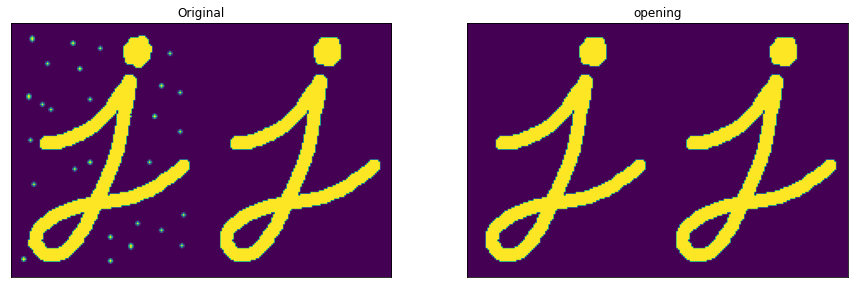

In [7]:
#get noisy image
name=baseFileNameList[1]
img=imgDict[name]

#filter
imgnew = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
disp2img(img, imgnew, img2Title="opening", figSize=(15,15));

# closing

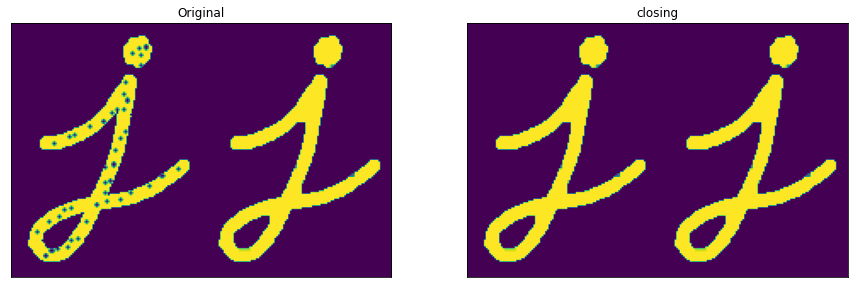

In [8]:
#get noisy image
name=baseFileNameList[2]
img=imgDict[name]

#filter
imgnew = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
disp2img(img, imgnew, img2Title="closing", figSize=(15,15));

# morfological gradient

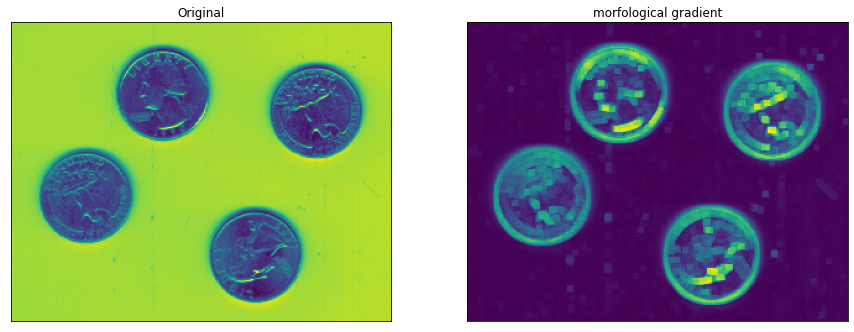

In [9]:
#use the dict as a switch-case
name=baseFileNameList[4]
img=imgDict[name]
kernel = np.ones((5,5),np.uint8)
imgnew = cv2.morphologyEx(img,cv2.MORPH_GRADIENT, kernel)
disp2img(img, imgnew, img2Title="morfological gradient", figSize=(15,15));

# Top Hat vs black hat

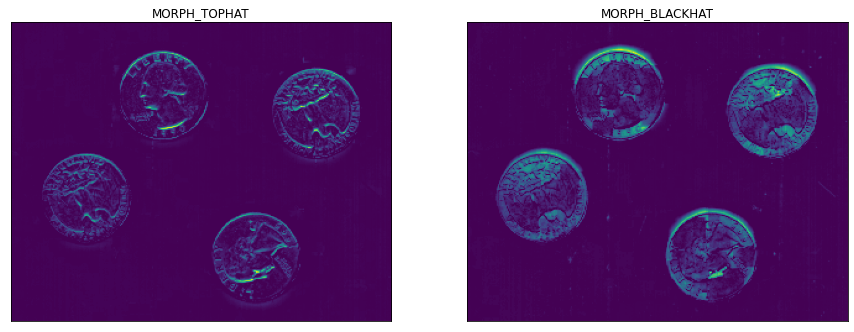

In [10]:
name=baseFileNameList[4]
img=imgDict[name]
kernel = np.ones((7,7),np.uint8)
imgnew1 = cv2.morphologyEx(img,cv2.MORPH_TOPHAT, kernel)
imgnew2 = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)

disp2img(imgnew1, imgnew2,  img2Title="MORPH_BLACKHAT", img1Title="MORPH_TOPHAT", figSize=(15,15));

# Structuring Elementm

In [24]:
NR, NC=(13,11)
seList=list();
se=cv2.getStructuringElement(cv2.MORPH_RECT,(NC, NR))
print(se)
seList.append(se);
print(" ")
se=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(NC, NR))
print(se)
seList.append(se);
print(" ")
se=cv2.getStructuringElement(cv2.MORPH_CROSS,(NC, NR))
print(se)
seList.append(se);
print(" ")


[[1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]]
 
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]
 
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]
 


## ahora hacemos una operacion morfologica

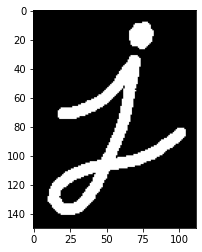

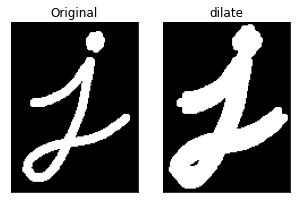

In [25]:
#use the dict as a switch-case
name=baseFileNameList[0]
img=imgDict[name]
plt.imshow(img)
imgnew = cv2.dilate(img,seList[2],iterations = 1)
disp2img(img, imgnew, img2Title="dilate");